# SCCOR (Specialized Centers of Clinically Oriented Research) Dataset Analysis

In [28]:
import os
import string
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
%matplotlib inline

In [3]:
path = '/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/SCCOR/CT_Exams/'

In [4]:
patients = os.listdir(path)

#### Total Number of Patients:

In [5]:
len(patients)

754

In [25]:
SCCORDict = {}
unique_series = {}
for patient in patients:
    appointments = os.listdir(path + patient)
    appointment_dict = {}
    for appointment in appointments:
        series = os.listdir(path + patient + '/' + appointment)
        series_dict = {}
        for ser in series:
            files = os.listdir(path + patient + '/' + appointment + '/' + ser)
            unique_series.update({ser : 1})
            if len(files) > 0:
                series_dict.update({ser : len(files)})

        appointment_dict.update({appointment : series_dict})

    SCCORDict.update({patient : appointment_dict})
            

#### Patient-wise, Appointment-wise, Series-wise file count:

In [15]:
SCCORDict

{'1-0001-7': {'Date_20070811': {'001': 1, '002': 474, '003': 119, '004': 119},
  'Date_20090926': {'001': 1, '002': 467, '003': 117, '004': 117}},
 '1-0002-5': {'Date_20070811': {'001': 1, '002': 450, '003': 113, '004': 113},
  'Date_20091114': {'001': 1, '002': 483, '003': 121, '004': 121}},
 '1-0003-5': {'Date_20070714': {'001': 1, '002': 486, '003': 122, '004': 122},
  'Date_20091114': {'001': 1, '002': 542, '003': 136, '004': 136},
  'Date_20131207': {'001': 1, '002': 546, '003': 121, '004': 121}},
 '1-0004-2': {'Date_20071006': {'001': 1, '002': 441, '003': 111, '004': 111},
  'Date_20110709': {'001': 1, '002': 458, '003': 115, '004': 115},
  'Date_20131123': {'001': 1, '002': 501, '003': 126, '004': 126}},
 '1-0005-3': {'Date_20070811': {'001': 1, '002': 464, '003': 116, '004': 116},
  'Date_20090926': {'001': 1, '002': 445, '003': 112, '004': 112},
  'Date_20131012': {'001': 1, '002': 540, '003': 135, '004': 135}},
 '1-0006-7': {'Date_20070811': {'001': 1, '002': 487, '003': 122

#### All the appointments & series of those appointments for a single patient:

In [20]:
print(patients[0])
SCCORDict[patients[0]]

1-0253-8


{'Date_20080628': {'001': 1, '002': 131, '003': 131, '004': 521},
 'Date_20100724': {'001': 1, '002': 523, '003': 133, '004': 133},
 'Date_20140913': {'001': 1, '002': 542, '003': 136, '004': 136}}

#### Different types of Series:

In [27]:
sorted(unique_series.keys())

['001',
 '002',
 '003',
 '004',
 '005',
 '102',
 '105',
 '301',
 '302',
 '400',
 '601',
 '997']

Modality SR has only Series 997

Rest all series are for CT scans

Series 1 = 2D Lung X-ray (consisting of 1 or 2 dcm files)

Series 2 = 3D image consisting of many dcm files (multiple frames). Have Axial, Coronal & Sagittal planes

Series 3 = Recon 2: Reconstruction from Series 2 (usually less frames than Series 2)

Series 4 = Recon 3: Reconstruction from Series 3 (I think), with more clarity in the image but with same frame numbers


#### Difference between Series 3 & Series 4

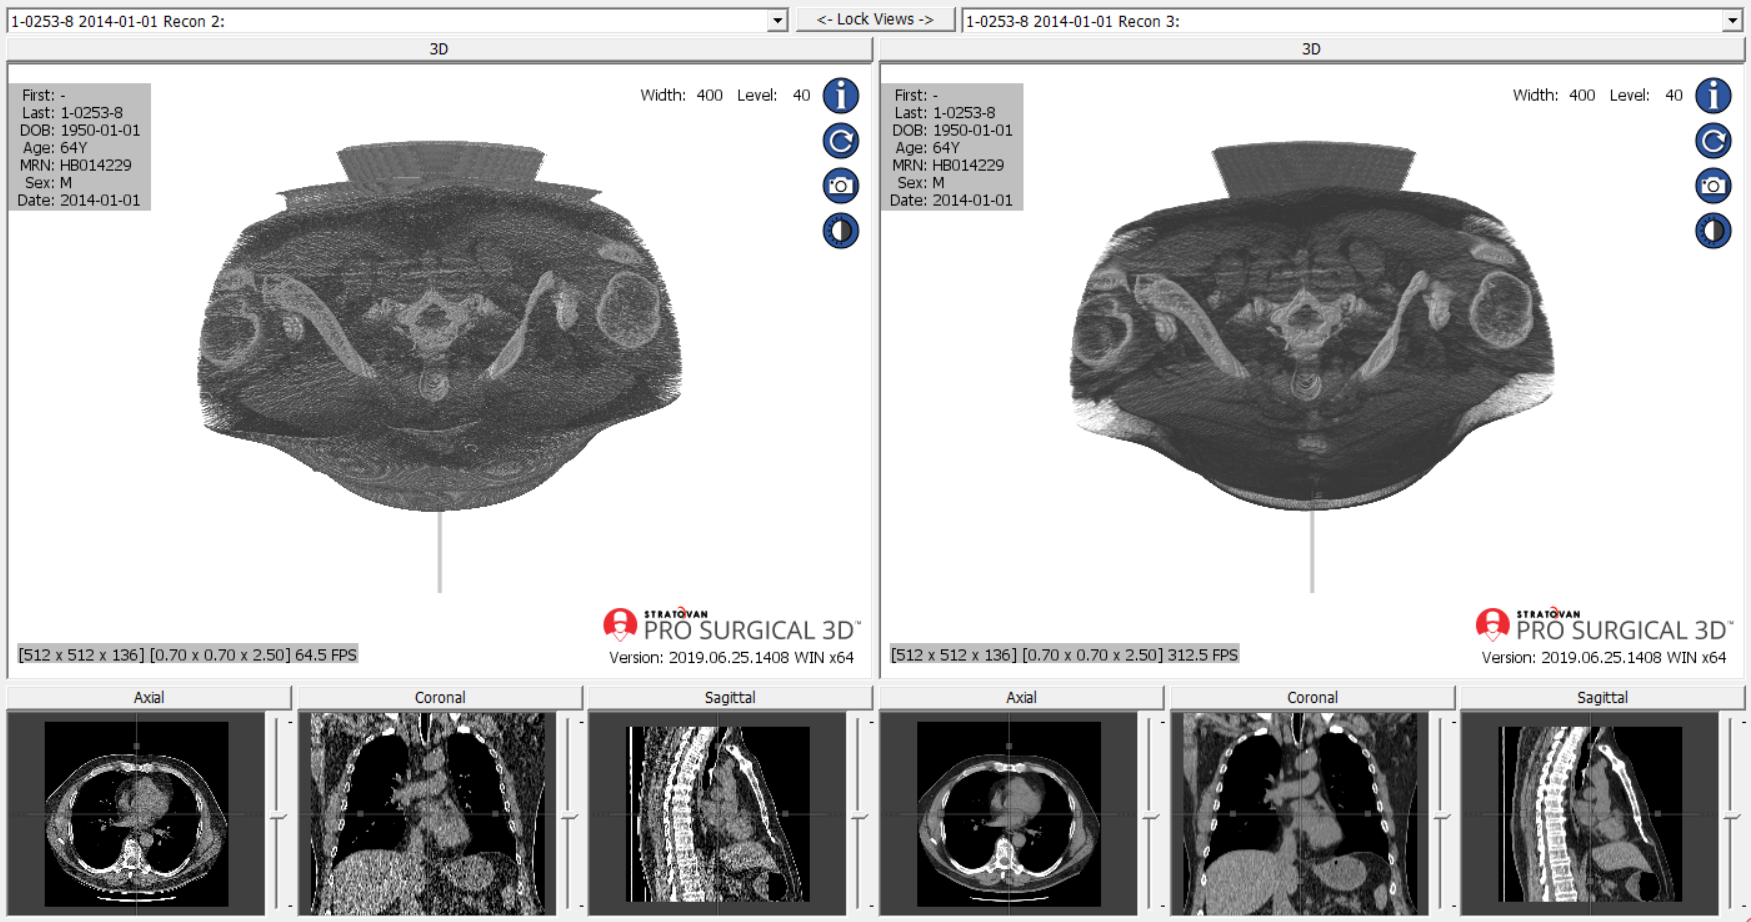

In [29]:
img1 = Image.open("imgs/ser2vs3.png")
img1

#### Below is the difference between Series 2 & Series 3 image (Notice that Series 2 has 542 frames, whereas Series 3 has only 136 frames, but the image quality is almost same)

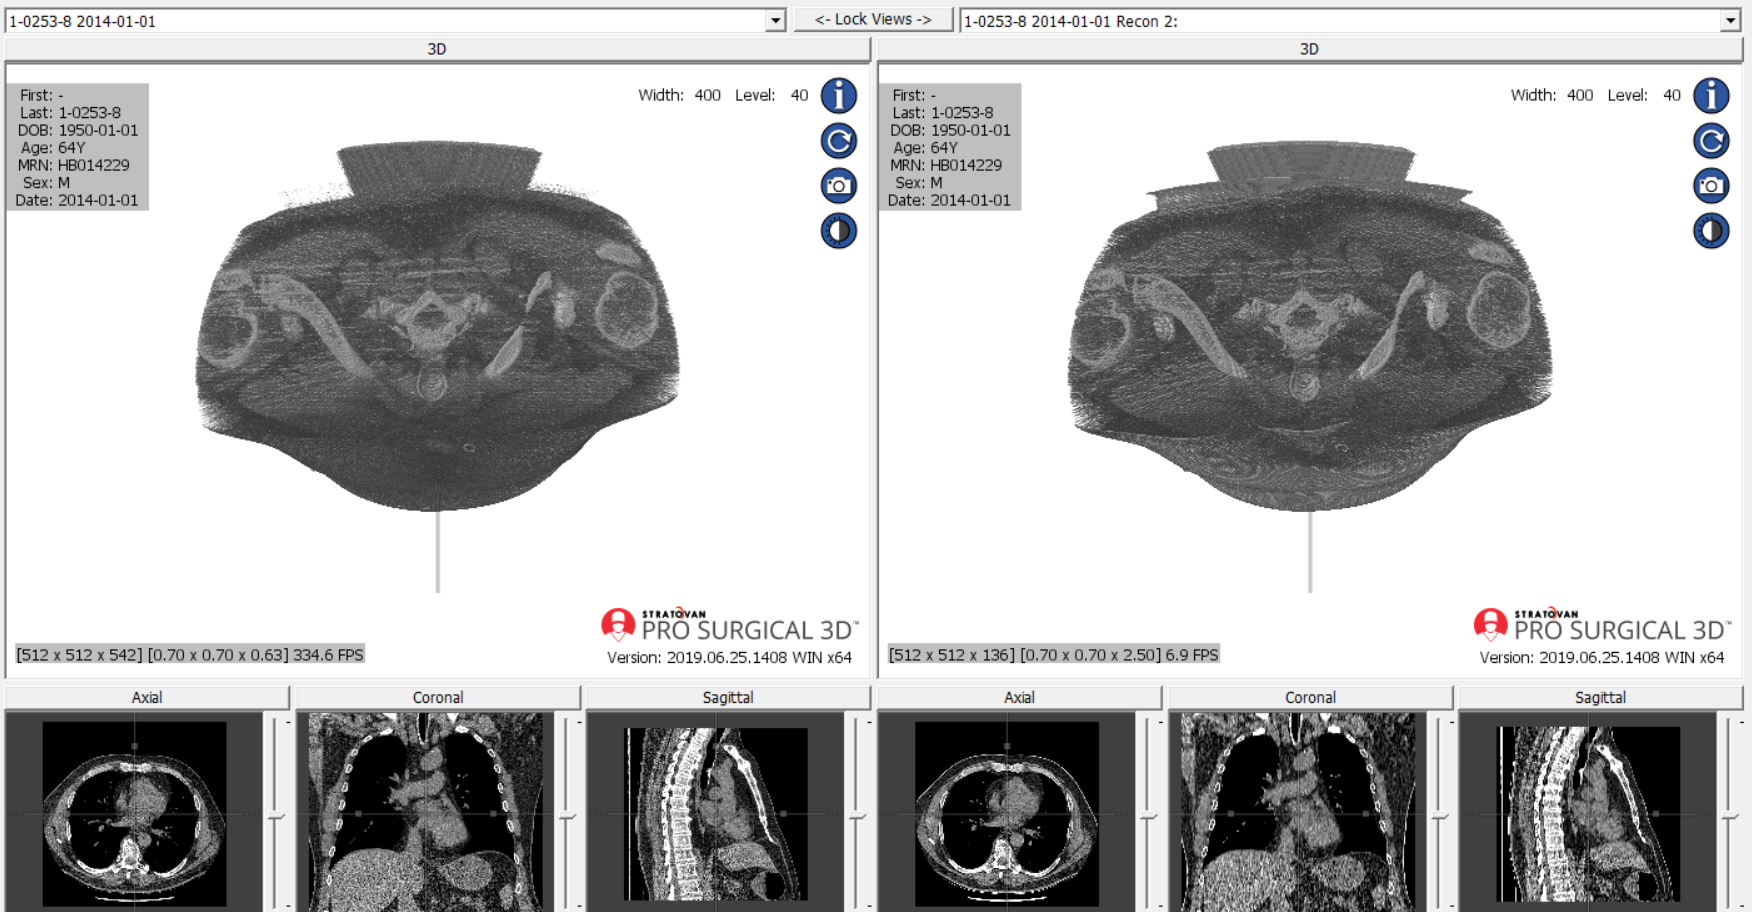

In [30]:
img2 = Image.open("imgs/ser3vs4.png")
img2